In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import sklearn

%pylab inline

Populating the interactive namespace from numpy and matplotlib


c:\Anaconda3\envs\ipykernel_py2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
df = pd.read_csv('data/churn.csv')

df_phone = pd.get_dummies(df['phone'])
frames = [df, df_phone]
df = pd.concat(frames, axis=1)
df = df.drop('phone', axis=1)

df_city = pd.get_dummies(df['city'])
frames = [df, df_city]
df = pd.concat(frames, axis=1)
df = df.drop('city', axis=1)

In [3]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Android,iPhone,Astapor,King's Landing,Winterfell
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,True,46.2,0.0,1.0,0.0,1.0,0.0
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,False,50.0,1.0,0.0,1.0,0.0,0.0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,False,100.0,0.0,1.0,1.0,0.0,0.0
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,True,80.0,0.0,1.0,0.0,1.0,0.0
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,False,82.4,1.0,0.0,0.0,0.0,1.0


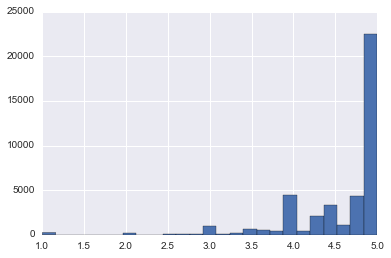

In [5]:
#df['trips_in_first_30_days'].hist(bins=25)

df['avg_rating_of_driver'].hist(bins=25)


KeyboardInterrupt: 

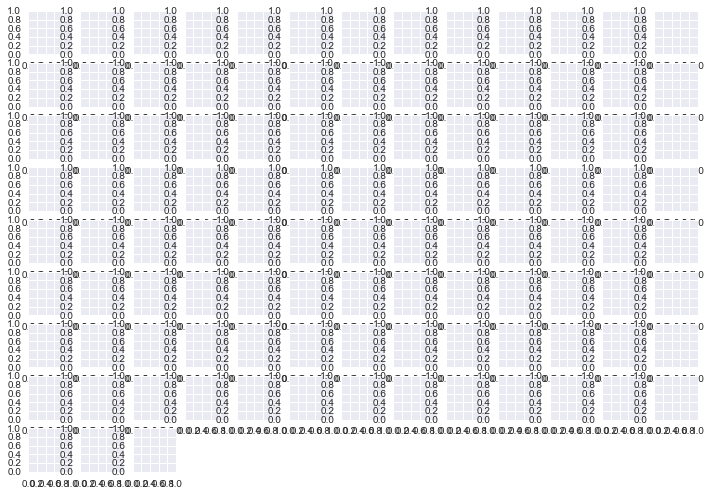

In [6]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(12, 12), diagonal='kde')


In [ ]:
df.head()

In [7]:
df['last_trip_date'].head()

0    2014-06-17
1    2014-05-05
2    2014-01-07
3    2014-06-29
4    2014-03-15
Name: last_trip_date, dtype: object

In [8]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Android,iPhone,Astapor,King's Landing,Winterfell
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,True,46.2,0.0,1.0,0.0,1.0,0.0
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,False,50.0,1.0,0.0,1.0,0.0,0.0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,False,100.0,0.0,1.0,1.0,0.0,0.0
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,True,80.0,0.0,1.0,0.0,1.0,0.0
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,False,82.4,1.0,0.0,0.0,0.0,1.0


In [9]:
df.last_trip_date = pd.to_datetime(df.last_trip_date)
df.signup_date = pd.to_datetime(df.signup_date)
df['days_since_signup'] = (df.last_trip_date.max() - df.signup_date) / np.timedelta64(1, 'D')

In [10]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Android,iPhone,Astapor,King's Landing,Winterfell,days_since_signup
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,True,46.2,0.0,1.0,0.0,1.0,0.0,157.0
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,False,50.0,1.0,0.0,1.0,0.0,0.0,153.0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,False,100.0,0.0,1.0,1.0,0.0,0.0,176.0
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,True,80.0,0.0,1.0,0.0,1.0,0.0,172.0
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,False,82.4,1.0,0.0,0.0,0.0,1.0,155.0


In [11]:
df['days_since_last_trip'] = (df.last_trip_date.max() - df.last_trip_date) / np.timedelta64(1, 'D')
df['churn'] = (df['days_since_last_trip'] > 30)

In [12]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Android,iPhone,Astapor,King's Landing,Winterfell,days_since_signup,days_since_last_trip,churn
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,True,46.2,0.0,1.0,0.0,1.0,0.0,157.0,14.0,False
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,False,50.0,1.0,0.0,1.0,0.0,0.0,153.0,57.0,True
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,False,100.0,0.0,1.0,1.0,0.0,0.0,176.0,175.0,True
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,True,80.0,0.0,1.0,0.0,1.0,0.0,172.0,2.0,False
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,False,82.4,1.0,0.0,0.0,0.0,1.0,155.0,108.0,True


In [28]:
y = df['churn']
col=['avg_dist', 'avg_surge', 'surge_pct',
       'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct',
       'Android', u'iPhone', 'days_since_signup', 'Astapor', 'King\'s Landing', 'Winterfell']
X = df[col]

X.head()

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
logreg = LogisticRegression()
cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean()

0.7177201070056044

In [29]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model = LogisticRegression()
model.fit(X_train, y_train)
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,avg_dist,[0.0365298371917]
1,avg_surge,[0.221685481151]
2,surge_pct,[-0.00382466033023]
3,trips_in_first_30_days,[-0.119326989606]
4,luxury_car_user,[-0.875146715994]
5,weekday_pct,[0.000188796560761]
6,Android,[0.479924578495]
7,iPhone,[-0.632926773459]
8,days_since_signup,[-0.0048243419021]
9,Astapor,[1.16804730748]


In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
print gbc.score(X_test, y_test)
pd.DataFrame(zip(X.columns, np.transpose(gbc.feature_importances_)))


0.779866666667


,0,1
0,avg_dist,0.127929
1,avg_surge,0.058749
2,surge_pct,0.140887
3,trips_in_first_30_days,0.122663
4,luxury_car_user,0.064690
5,weekday_pct,0.261982
6,Android,0.034114
7,iPhone,0.035878
8,days_since_signup,0.038184
9,Astapor,0.046955
